<a href="https://colab.research.google.com/github/xadicavadzade/KNN-from-scratch-in-python/blob/main/linear_ridge_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle (1).json


In [33]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [34]:
!kaggle datasets download -d quantbruce/real-estate-price-prediction


Dataset URL: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction
License(s): other
real-estate-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [35]:
!unzip real-estate-price-prediction.zip -d dataset_folder

Archive:  real-estate-price-prediction.zip
  inflating: dataset_folder/Real estate.csv  


In [36]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('/content/data/Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# **Understand the data**

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [53]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


**'No'** column is same as index column we can drop it

**'X1 transaction date'** column is between 2012-2013, not much variation → may not be very useful we can drop it too

**'X2 house age'** there is no big outliers 0-43

**'X3 distance to the nearest MRT station'** there are huge outliers we have to fix it

**'X4 number of convenience stores'** range between 0 - 10 more like categorical data

**'X5 latitude, X6 longitude'** Very small range, only a local area in Taipei. Useful for location-based differences in price.

**'Y house price of unit area'** outliar exits

In [54]:
df = df.drop(['No','X1 transaction date'],axis=1)
df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


# **Handling Outliers**

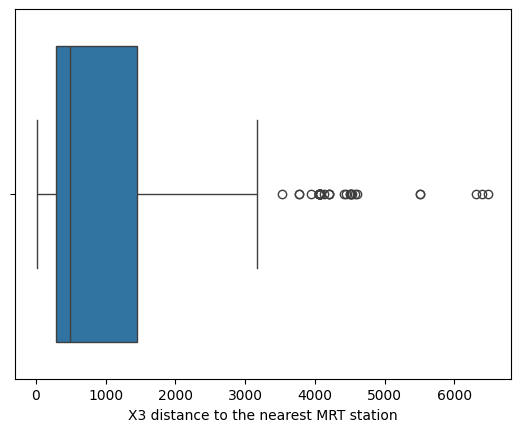

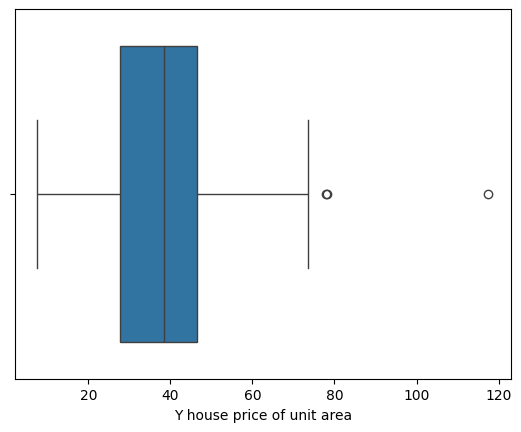

In [55]:

sns.boxplot(x=df["X3 distance to the nearest MRT station"])
plt.show()

sns.boxplot(x=df["Y house price of unit area"])
plt.show()


In [56]:
df = df[df["X3 distance to the nearest MRT station"] < 4000]
df = df[df["Y house price of unit area"] < 80]

# **Split into train/test**

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop("Y house price of unit area", axis=1)
y = df["Y house price of unit area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# i split 20/80 (test/train)



# **Feature Scaling**

In [58]:
#For writing my own Gradient Descent Feature Scaling is required
#(Big feature values → big gradients → slower or unstable training)
#But if you use Sklearn Scaling is recommended
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# **Train my model - Linear Regression From Scracth**

In [59]:
n, m = X.shape
w = np.zeros(m)
b = 0
alpha = 0.001
epoch = 10000

def gradient_descent(w,b,alpha, X_train, y_train):

  prediction = np.dot(X_train,w) + b
  error = prediction - y_train

  w_grad = (2/n)*X_train.T.dot(error)
  b_grad = (2/n)*np.sum(error)

  w -= alpha*w_grad
  b -= alpha*b_grad


  return w,b
for i in range(epoch):
  w,b = gradient_descent(w, b, alpha, X_train, y_train)
w,b



(array([-3.16855105, -4.23649097,  3.29500202,  2.42102493,  0.58902467]),
 np.float64(39.58617981240763))

In [60]:
y_pred = np.dot(X_test,w) + b

mse = np.mean((y_pred - y_test)**2)

rmse = np.sqrt(mse)

mae = np.mean(np.abs(y_pred - y_test))

ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)


print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

MSE: 70.1037863965322
RMSE: 8.3728003915376
MAE: 6.051161497140403
R²: 0.5502237859011994


In [69]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()


model.fit(X_train, y_train)

LinearRegression()

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)


rmse = np.sqrt(mse)


mae = mean_absolute_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

MSE: 70.10335233721088
RMSE: 8.372774470700312
MAE: 6.05184904534789
R²: 0.5502264356742447


In [71]:

def ridge_gradient_descent(w,b,alpha, X_train, y_train, lambda_):

  prediction = np.dot(X_train,w) + b
  error = prediction - y_train

  w_grad = (2/n)*(X_train.T.dot(error) + 2*lambda_*w)
  b_grad = (2/n)*np.sum(error)

  w -= alpha*w_grad
  b -= alpha*b_grad


  return w,b

In [72]:

w = np.zeros(X_train.shape[1])
b = 0
alpha = 0.001
epoch = 10000
lambda_ = 0.01


for i in range(epoch):
  w, b = ridge_gradient_descent(w, b, alpha, X_train, y_train, lambda_)

y_pred = X_test.dot(w) + b

mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = 1 - np.sum((y_test - y_pred)**2)/np.sum((y_test - np.mean(y_test))**2)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

MSE: 70.10444568527097
RMSE: 8.372839762307109
MAE: 6.051172684987714
R²: 0.5502194209019456


In [73]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=0.1)

ridge_model.fit(X_train, y_train)



Ridge(alpha=0.1)

In [74]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)


rmse = np.sqrt(mse)


mae = mean_absolute_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

MSE: 70.10335233721088
RMSE: 8.372774470700312
MAE: 6.05184904534789
R²: 0.5502264356742447


In [76]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np


model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

print("For each fold R²:", scores)
print("Average R²:", np.mean(scores))


For each fold R²: [0.54060294 0.30787338 0.53842018 0.58141195 0.55154592]
Average R²: 0.5039708723839376
